In [1]:
import pulp

# Create a Linear Programming problem
lp_problem = pulp.LpProblem("Simple_LP", pulp.LpMaximize)

# Create variables
x = pulp.LpVariable('x', lowBound=0)  # x >= 0
y = pulp.LpVariable('y', lowBound=0)  # y >= 0

# Objective function: Maximize 3x + 2y
lp_problem += 3 * x + 2 * y

# Constraint: x + y <= 4
lp_problem += x + y <= 4

# Solve the problem
solver = pulp.PULP_CBC_CMD(msg=True)
lp_problem.solve(solver)

# Print the results
print(f"Status: {pulp.LpStatus[lp_problem.status]}")
print(f"Optimal value: {pulp.value(lp_problem.objective)}")
print(f"x: {pulp.value(x)}")
print(f"y: {pulp.value(y)}")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/mad/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/76e6bbf4c207461b90d7a34f2cd12b69-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/76e6bbf4c207461b90d7a34f2cd12b69-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 6 COLUMNS
At line 11 RHS
At line 13 BOUNDS
At line 14 ENDATA
Problem MODEL has 1 rows, 2 columns and 2 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-1) rows, 0 (-2) columns and 0 (-2) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 12
After Postsolve, objective 12, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 12 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Status:

**************************************************
Optimal value: 0.12999999523162842
x: 0.029999999329447746
y: 0.019999999552965164
**************************************************
Optimal value: 1.429999828338623
x: 0.32999998331069946
y: 0.21999996900558472
**************************************************
Optimal value: 2.7299997806549072
x: 0.6299998760223389
y: 0.4200000464916229
**************************************************
Optimal value: 4.029998779296875
x: 0.929999589920044
y: 0.6199999451637268
**************************************************
Optimal value: 5.329997539520264
x: 1.229999303817749
y: 0.8199997544288635
**************************************************
Optimal value: 6.629996299743652
x: 1.529999017715454
y: 1.019999623298645
**************************************************
Optimal value: 7.929994583129883
x: 1.8299987316131592
y: 1.2199994325637817
**************************************************
Optimal value: 9.22999382019043
x: 2.12999844551

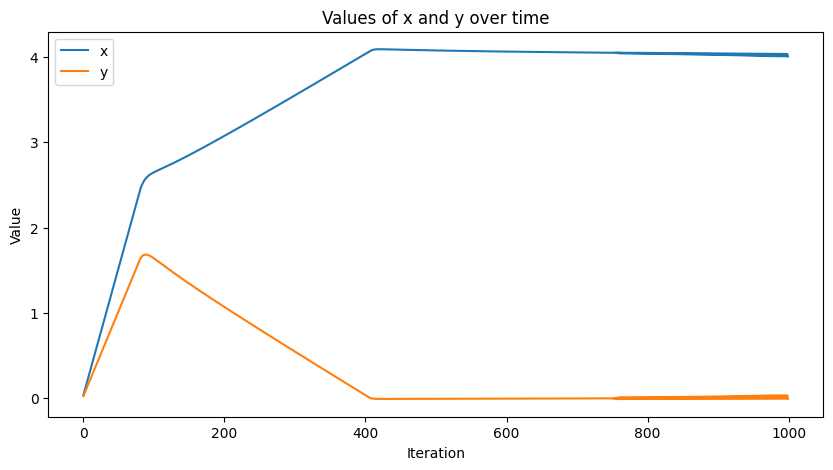

In [11]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the variables with initial values and set requires_grad=True for optimization
x = torch.tensor(0.0, requires_grad=True)
y = torch.tensor(0.0, requires_grad=True)

# Define the penalty weight
penalty_weight = 2137.0

# Define the optimizer
optimizer = optim.SGD([x, y], lr=0.01)

# Objective function with penalty terms
def objective(intensity):
    # Original objective function: 3x + 2y
    obj = 3 * x + 2 * y
    
    # Penalty for constraint: x + y <= 4
    constraint_penalty = intensity * 44 * torch.relu(x + y - 4) ** 2 
    
    # Penalty for non-negativity constraints
    nonnegativity_penalty = intensity * 88 * (torch.relu(-x)**2 + torch.relu(-y)**2)
    
    # Total objective with penalties
    total_objective = obj - constraint_penalty - nonnegativity_penalty
    
    return total_objective

# Training loop
num_iterations = 1000
x_values = []
y_values = []

for iteration in range(num_iterations):
    optimizer.zero_grad()
    loss = -objective(intensity=(iteration + 1) / num_iterations)  # We minimize the negative objective to maximize the original objective
    loss.backward()
    optimizer.step()
    
    # Record the values of x and y
    x_values.append(x.item())
    y_values.append(y.item())
    
    if iteration % 10 == 0:
        print('*' * 50)
        # Print the results
        print(f"Optimal value: {objective(intensity=1).item()}")
        print(f"x: {x.item()}")
        print(f"y: {y.item()}")

# Print the final results
print('*' * 50)
print("Final results:")
print(f"Optimal value: {objective(intensity=1).item()}")
print(f"x: {x.item()}")
print(f"y: {y.item()}")

# Plot the values of x and y over time
plt.figure(figsize=(10, 5))
plt.plot(x_values, label='x')
plt.plot(y_values, label='y')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values of x and y over time')
plt.legend()
plt.show()


In [32]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the variables with initial values and set requires_grad=True for optimization
flow_sv = torch.tensor(0.0, requires_grad=True)  # Flow from source to v
flow_su = torch.tensor(0.0, requires_grad=True)  # Flow from source to u
flow_vs = torch.tensor(0.0, requires_grad=True)  # Flow from v to sink
flow_us = torch.tensor(0.0, requires_grad=True)  # Flow from u to sink
flow_vu = torch.tensor(0.0, requires_grad=True)  # Flow from v to u

# Define the capacities
capacity_sv = 2
capacity_su = 1
capacity_vs = 1
capacity_us = 2
capacity_vu = 1

# Define the penalty weight
penalty_weight = 2137.0

# Define the optimizer
optimizer = optim.SGD([flow_sv, flow_su, flow_vs, flow_us, flow_vu], lr=0.01)

# Objective function with penalty terms
def objective(intensity):
    # Original objective function: total flow to the sink
    obj = flow_vs + flow_us
    
    # Penalty for capacity constraints
    capacity_penalty = (
        intensity * torch.relu(flow_sv - capacity_sv) ** 2 +
        intensity * torch.relu(flow_su - capacity_su) ** 2 +
        intensity * torch.relu(flow_vs - capacity_vs) ** 2 +
        intensity * torch.relu(flow_us - capacity_us) ** 2 +
        intensity * torch.relu(flow_vu - capacity_vu) ** 2
    )
    
    # Penalty for non-negativity constraints
    nonnegativity_penalty = (
        intensity * torch.relu(-flow_sv) ** 2 +
        intensity * torch.relu(-flow_su) ** 2 +
        intensity * torch.relu(-flow_vs) ** 2 +
        intensity * torch.relu(-flow_us) ** 2 +
        intensity * torch.relu(-flow_vu) ** 2
    )
    
    # Penalty for flow conservation at node v: (inflow - outflow)^2
    flow_conservation_v_penalty = intensity * (flow_sv - flow_vs - flow_vu) ** 2
    
    # Penalty for flow conservation at node u: (inflow - outflow)^2
    flow_conservation_u_penalty = intensity * (flow_su + flow_vu - flow_us) ** 2
    
    # Total objective with penalties
    total_objective = obj - penalty_weight * (capacity_penalty + nonnegativity_penalty + flow_conservation_v_penalty + flow_conservation_u_penalty)
    
    return total_objective

# Training loop
num_iterations = 100000
flow_sv_values = []
flow_su_values = []
flow_vs_values = []
flow_us_values = []
flow_vu_values = []
objective_values = []

for iteration in range(num_iterations):
    optimizer.zero_grad()
    loss = -objective(intensity=(iteration + 1) / num_iterations)  # We minimize the negative objective to maximize the original objective
    loss.backward()
    
    # Clip gradients to have norm less than 0.1
    torch.nn.utils.clip_grad_norm_([flow_sv, flow_su, flow_vs, flow_us, flow_vu], max_norm=0.1)
    
    optimizer.step()
    
    # Record the flow values and objective
    flow_sv_values.append(flow_sv.item())
    flow_su_values.append(flow_su.item())
    flow_vs_values.append(flow_vs.item())
    flow_us_values.append(flow_us.item())
    flow_vu_values.append(flow_vu.item())
    objective_values.append(objective(intensity=1).item())
    
    if iteration % 10 == 0:
        print('*' * 50)
        # Print the results
        print(f"Iteration {iteration}:")
        print(f"Flow from source to v (flow_sv): {flow_sv.item()}")
        print(f"Flow from source to u (flow_su): {flow_su.item()}")
        print(f"Flow from v to sink (flow_vs): {flow_vs.item()}")
        print(f"Flow from u to sink (flow_us): {flow_us.item()}")
        print(f"Flow from v to u (flow_vu): {flow_vu.item()}")
        print(f"Objective value: {objective(intensity=1).item()}")

# Print the final results
print('*' * 50)
print("Final results:")
print(f"Flow from source to v (flow_sv): {flow_sv.item()}")
print(f"Flow from source to u (flow_su): {flow_su.item()}")
print(f"Flow from v to sink (flow_vs): {flow_vs.item()}")
print(f"Flow from u to sink (flow_us): {flow_us.item()}")
print(f"Flow from v to u (flow_vu): {flow_vu.item()}")
print(f"Maximum flow value: {objective(intensity=1).item()}")

# Plot the values of flow variables over time
plt.figure(figsize=(12, 6))
plt.plot(flow_sv_values, label='flow_sv (source to v)')
plt.plot(flow_su_values, label='flow_su (source to u)')
plt.plot(flow_vs_values, label='flow_vs (v to sink)')
plt.plot(flow_us_values, label='flow_us (u to sink)')
plt.plot(flow_vu_values, label='flow_vu (v to u)')
plt.xlabel('Iteration')
plt.ylabel('Flow Value')
plt.title('Flow Values Over Time')
plt.legend()
plt.show()


**************************************************
Iteration 0:
Flow from source to v (flow_sv): 0.0
Flow from source to u (flow_su): 0.0
Flow from v to sink (flow_vs): 0.0007071062573231757
Flow from u to sink (flow_us): 0.0007071062573231757
Flow from v to u (flow_vu): 0.0
Objective value: -0.0007227844325825572
**************************************************
Iteration 10:
Flow from source to v (flow_sv): 9.417277397005819e-06
Flow from source to u (flow_su): 9.417277397005819e-06
Flow from v to sink (flow_vs): 0.007778158877044916
Flow from u to sink (flow_us): 0.007778158877044916
Flow from v to u (flow_vu): 0.0
Objective value: -0.24239389598369598
**************************************************
Iteration 20:
Flow from source to v (flow_sv): 6.617887993343174e-05
Flow from source to u (flow_su): 6.617887993343174e-05
Flow from v to sink (flow_vs): 0.014848967082798481
Flow from u to sink (flow_us): 0.014848967082798481
Flow from v to u (flow_vu): 0.0
Objective value: -0.9043

KeyboardInterrupt: 

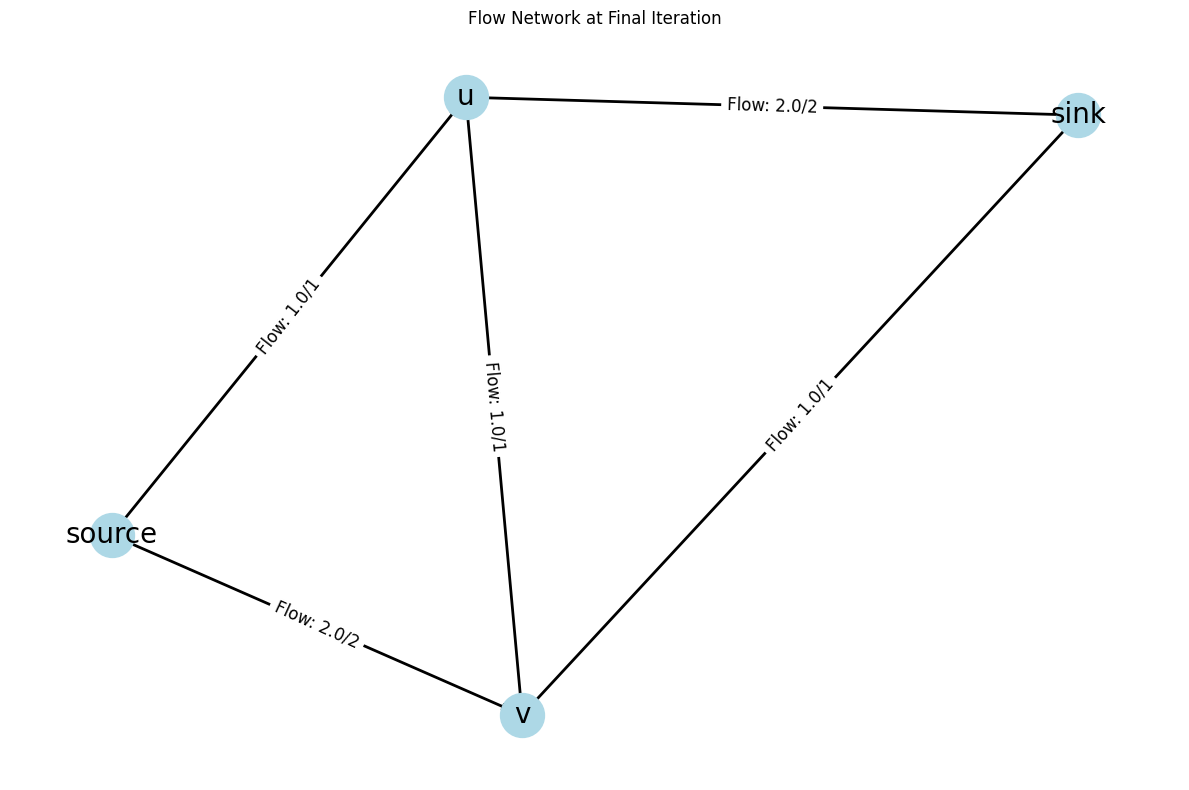

In [35]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import networkx as nx
# Network graph definition
G = nx.DiGraph()
edges = [
    ('source', 'v', {'capacity': capacity_sv}),
    ('source', 'u', {'capacity': capacity_su}),
    ('v', 'sink', {'capacity': capacity_vs}),
    ('u', 'sink', {'capacity': capacity_us}),
    ('v', 'u', {'capacity': capacity_vu})
]
G.add_edges_from(edges)

# Plotting the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Draw the graph nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=1000)

# Draw the graph edges with capacities and flow values
edge_labels = {}
for u, v, data in G.edges(data=True):
    capacity = data['capacity']
    if (u, v) == ('source', 'v'):
        flow_value = round(flow_sv.item(), 2)
    elif (u, v) == ('source', 'u'):
        flow_value = round(flow_su.item(), 2)
    elif (u, v) == ('v', 'sink'):
        flow_value = round(flow_vs.item(), 2)
    elif (u, v) == ('u', 'sink'):
        flow_value = round(flow_us.item(), 2)
    elif (u, v) == ('v', 'u'):
        flow_value = round(flow_vu.item(), 2)
    edge_labels[(u, v)] = f'Flow: {flow_value}/{capacity}'

nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, arrows=True)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Plot configuration
plt.title(f'Flow Network at Final Iteration')
plt.axis('off')
plt.tight_layout()
plt.show()
